# (1) Pre-proccesing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
test = pd.read_csv("UNSW_NB15_testing-set.csv", sep=',', header=0, encoding='cp1252')
train = pd.read_csv("UNSW_NB15_training-set.csv", sep=',', header=0, encoding='cp1252')
# Concatenate test and train set
df = pd.concat([train, test])
df.shape
train.shape, test.shape, df.shape

((82332, 45), (175341, 45), (257673, 45))

## Data Visualization

In [ ]:
corr = df.corr()
sns.set_theme('notebook')

mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

plt.figure(figsize=(40,24))
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=1.)

In [13]:
# Print the number of train / test samples
print(f"Train data length: {len(train)}")
print(f"Test data length: {len(test)}")

Train data length: 82332
Test data length: 175341


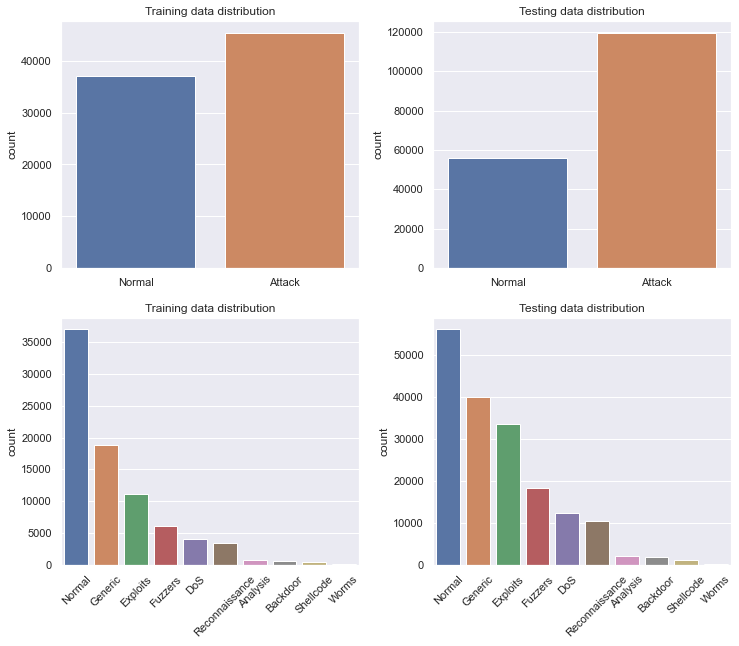

In [14]:
# Visualise the distribution of attacks and normal traffic
f, axes = plt.subplots(2, 2, figsize=(12, 10))

# Create the plots
sns.countplot(x="label", data=train, ax=axes[0,0])
sns.countplot(x="label", data=test, ax=axes[0,1])
sns.countplot(x="attack_cat", data=train, ax=axes[1,0], order = train['attack_cat'].value_counts().index)
sns.countplot(x="attack_cat", data=test, ax=axes[1,1], order = test['attack_cat'].value_counts().index)

# Set the plot titles
axes[0,0].set_title("Training data distribution")
axes[1,0].set_title("Training data distribution")
axes[0,1].set_title("Testing data distribution")
axes[1,1].set_title("Testing data distribution")

# Rotate xticks for readability
axes[1,0].tick_params('x', labelrotation=45)
axes[1,1].tick_params('x', labelrotation=45)

# Change the xtick labels for attack / normal
axes[0,0].set_xticklabels(["Normal", "Attack"])
axes[0,1].set_xticklabels(["Normal", "Attack"])

# Remove xlabels
axes[0,0].set_xlabel("")
axes[0,1].set_xlabel("")
axes[1,0].set_xlabel("")
axes[1,1].set_xlabel("")

# Add some space between the plots for y labels
plt.subplots_adjust(wspace=0.25)